In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 

**Importing the dataset**

In [2]:
data=pd.read_csv('/Users/alok.g.v/Desktop/python practice/Guvi Task/Task7/Assignment11_to_16/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
gender_dum=pd.get_dummies(data['Gender'],prefix='Gender')
data=pd.concat([data,gender_dum],axis=1)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [7]:
scaler=StandardScaler()
data['EstimatedSalary']=scaler.fit_transform(data[['EstimatedSalary']])
X=data[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=data[['Purchased']]


**Splitting the dataset into the Training set and Test set**

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(280, 4) (120, 4) (280, 1) (120, 1)


**Feature Scaling**

**Fitting K-NN to the Training set**

In [11]:
def Knn(k):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    print(f'For {k} Neighbor the Accuracy is {acc}')


for x in range(1,11,2):
    Knn(x)

    

For 1 Neighbor the Accuracy is 0.8583333333333333
For 3 Neighbor the Accuracy is 0.8583333333333333
For 5 Neighbor the Accuracy is 0.9
For 7 Neighbor the Accuracy is 0.9083333333333333
For 9 Neighbor the Accuracy is 0.8916666666666667


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1

**Predicting the Test set results**

In [13]:
knn=KNeighborsClassifier(n_neighbors=7)
knn=knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


/Users/alok.g.v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Making the Confusion Matrix**

In [15]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[76,  6],
       [ 5, 33]])

<AxesSubplot:>

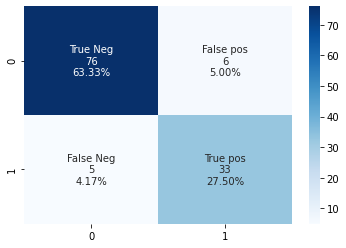

In [16]:
group_name=['True Neg','False pos','False Neg','True pos']
group_count=['{0:0.0f}'.format(value) for value in cm.flatten()]
group_per=['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_name,group_count,group_per)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels,cmap='Blues',fmt='')